In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
recall, precision, f1, errors, csv, csv2 = {}, {}, {}, {}, {}, {}
exp_name = 'syuron'
name_list2 = ['baseline', 'baseline parallel', 'w/ ESC', 'w/ ESC parallel']
name_list2 = ['baseline', 'baseline parallel', 'w/ ESC', 'w/ ESC parallel', 'GMF']
#name_list2 = ['baseline', 'baseline parallel']
#name_list2 = ['baseline', 'baseline parallel', 'w/ ESC', 'w/ ESC parallel']

for name2 in name_list2:
    recall[name2] = np.zeros(201)
    precision[name2] = np.zeros(201)
    f1[name2] = np.zeros(201)
    errors[name2] = []
    csv[name2] = []
    csv2[name2] = []

seeds_list = ["cv1", "cv2", "cv3", "cv4", "cv5"]
for seed in seeds_list: 
    name_list = ['model_np_baseline_char_s12345', 'model_baseline_char_s12345', 'model_w_lm_n_best3_lr3_np_char_s12345', 'model_w_lm_n_best3_lr3_char_s12345', 'gmf2_lr4_alpha2_char_s12345']
    for name, name2 in zip(name_list, name_list2):                        
        
        if 'gmf2_lr4_alpha2_char_s12345' == name:
            recall[name2] += np.load("../../exp/turn_shift_cv/M1_3000_500/delay100/{}/npy2/recall_{}.npy".format(name, seed))
            precision[name2] += np.load("../../exp/turn_shift_cv/M1_3000_500/delay100/{}/npy2/precision_{}.npy".format(name, seed))
            f1[name2] += np.load("../../exp/turn_shift_cv/M1_3000_500/delay100/{}/npy2/f1_{}.npy".format(name, seed))

            if len(csv[name2])>0:
                csv[name2] = pd.concat([csv[name2], pd.read_csv("../../exp/turn_shift_cv/M1_3000_500/delay100/{}/csv2/df_{}.csv".format(name, seed))])
            else:
                csv[name2] = pd.read_csv("../../exp/turn_shift_cv/M1_3000_500/delay100/{}/csv2/df_{}.csv".format(name, seed))
                
            if len(csv2[name2])>0:
                csv2[name2] = pd.concat([csv[name2], pd.read_csv("../../exp/turn_shift_cv/M1_3000_500/delay100/{}/csv2/df_silence_{}.csv".format(name, seed))])
            else:
                csv2[name2] = pd.read_csv("../../exp/turn_shift_cv/M1_3000_500/delay100/{}/csv2/df_silence_{}.csv".format(name, seed))
        
        else:
            recall[name2] += np.load("../../exp/{}/d100/{}/npy2/recall_{}.npy".format(exp_name, name, seed))
            precision[name2] += np.load("../../exp/{}/d100/{}/npy2/precision_{}.npy".format(exp_name, name, seed))
            f1[name2] += np.load("../../exp/{}/d100/{}/npy2/f1_{}.npy".format(exp_name, name, seed))

            errors[name2] += np.load("../../exp/{}/d100/{}/npy2/errors_{}.npy".format(exp_name, name, seed)).tolist()
            if len(csv[name2])>0:
                csv_tmp = pd.read_csv("../../exp/{}/d100/{}/csv2/df_{}.csv".format(exp_name, name, seed))
                csv_tmp['exp'] = [seed]*len(csv_tmp)
                csv[name2] = pd.concat([csv[name2], csv_tmp])
            else:
                csv[name2] = pd.read_csv("../../exp/{}/d100/{}/csv2/df_{}.csv".format(exp_name, name, seed))        
                csv[name2]['exp'] = [seed]*len(csv[name2])

            if len(csv2[name2])>0:
                csv_tmp = pd.read_csv("../../exp/{}/d100/{}/csv2/df_silence_{}.csv".format(exp_name, name, seed))        
                csv2[name2] = pd.concat([csv2[name2], csv_tmp])
            else:
                csv2[name2] = pd.read_csv("../../exp/{}/d100/{}/csv2/df_silence_{}.csv".format(exp_name, name, seed))        
        

for name2 in name_list2:
    recall[name2] /= len(seeds_list)
    precision[name2] /= len(seeds_list)
    f1[name2] /= len(seeds_list)
    
metrics_list = [precision, recall, f1]
err_list = np.arange(0, 3050, 50)

print('{}: {:d}ms, {:d}ms, {:d}ms'.format('metrics'.ljust(9), 50*5, 50*10, 50*20))
for name in name_list2:
    print(name)
    for i, metrics in enumerate(['precision', 'recall', 'f1']):
        print('{}: {:.3f}, {:.3f}, {:.3f}'.format(metrics.ljust(9), metrics_list[i][name][5], metrics_list[i][name][10], metrics_list[i][name][20]))
        
    print()

metrics  : 250ms, 500ms, 1000ms
baseline
precision: 0.340, 0.534, 0.700
recall   : 0.380, 0.587, 0.765
f1       : 0.357, 0.557, 0.729

baseline parallel
precision: 0.361, 0.550, 0.720
recall   : 0.389, 0.590, 0.771
f1       : 0.375, 0.569, 0.744

w/ ESC
precision: 0.364, 0.546, 0.707
recall   : 0.397, 0.596, 0.771
f1       : 0.380, 0.570, 0.737

w/ ESC parallel
precision: 0.373, 0.552, 0.707
recall   : 0.415, 0.615, 0.788
f1       : 0.393, 0.581, 0.745

GMF
precision: 0.270, 0.475, 0.582
recall   : 0.233, 0.410, 0.502
f1       : 0.248, 0.437, 0.535



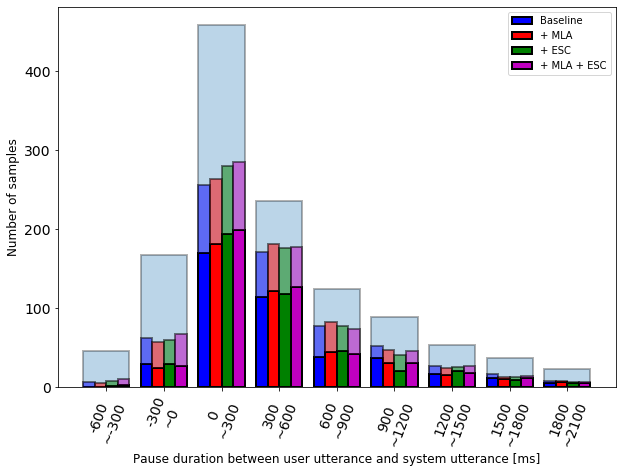

In [6]:
# システムが話す場面での評価
def get_score(AAE1=0, AAE2=250):
    nums = {'baseline':[], 'baseline parallel':[], 'w/ ESC': [], 'w/ ESC parallel': []}
    cr_list  = {'baseline':[], 'baseline parallel':[], 'w/ ESC': [], 'w/ ESC parallel': []}
    #durs = [-200, 0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800]
    durs = [-300, 0, 300, 600, 900, 1200, 1500, 1800, 2100]
    for name in ['baseline', 'baseline parallel', 'w/ ESC', 'w/ ESC parallel']:
        pre_total, pre_tp = 0, 0
        for dur in durs:
            df_test = csv[name]
            #df_tmp = df_test[(df_test['target']<dur) & (df_test['target']>dur-200)]
            #df_tmp = df_test[(df_test['target']<=dur) & (df_test['target']>dur-300)]
            df_tmp = df_test[(df_test['target']<dur) & (df_test['target']>=dur-300)]
            total = len(df_tmp)
            df_tmp = df_tmp[df_tmp['pred']<=dur+AAE2]
            df_tmp = df_tmp[(abs(df_tmp['error'])<=AAE2) & (abs(df_tmp['error'])>AAE1)]
            tp = len(df_tmp)
            nums[name].append(tp)
            cr_list[name].append(total)
            
    return nums, cr_list

plt.figure(figsize=(10, 7))
plt.subplots_adjust(hspace=0.8)
ax1 = plt.subplot(1, 1, 1)
# x = [str(n) for n in [-200, 0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800]]
# xl = ["{}~{}".format(n-200, n) for n in [-200, 0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800]]
x = [n for n in [-300, 0, 300, 600, 900, 1200, 1500, 1800, 2100]]
x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
x = np.array(x)
#xl = ["{}~{}".format(n-300, n) for n in [-300, 0, 300, 600, 900, 1200, 1500, 1800, 2100]]
xl = ["{}\n~{}".format(n-300, n) for n in [-300, 0, 300, 600, 900, 1200, 1500, 1800, 2100]]

margin=0.2
width = (1-margin)/4
totoal_width = 1-margin

nums, cr_list = get_score(0, 250)
nums2, cr_list2 = get_score(250, 500)
nums3, cr_list3 = get_score(500, 1000)

center = ((x-totoal_width*(1-(2*1+1)/4)/2) + (x-totoal_width*(1-(2*2+1)/4)/2)) / 2
p0 = ax1.bar(center, cr_list['baseline'], width=width*4, edgecolor="black", linewidth=2, alpha=0.3)

p1 = ax1.bar(x-totoal_width*(1-(2*0+1)/4)/2, nums['baseline'], width=width, color="b", edgecolor="black", linewidth=2)
p1_ = ax1.bar(x-totoal_width*(1-(2*0+1)/4)/2, nums2['baseline'], width=width, bottom=nums['baseline'], color="b", alpha=0.5, edgecolor="black", linewidth=2)

p2 = ax1.bar(x-totoal_width*(1-(2*1+1)/4)/2, nums['baseline parallel'], width=width, color="r", edgecolor="black", linewidth=2)
p2_ = ax1.bar(x-totoal_width*(1-(2*1+1)/4)/2, nums2['baseline parallel'], width=width, bottom=nums['baseline parallel'], color="r", alpha=0.5, edgecolor="black", linewidth=2)

p3 = ax1.bar(x-totoal_width*(1-(2*2+1)/4)/2, nums['w/ ESC'], width=width, color="g", edgecolor="black", linewidth=2)
p3_ = ax1.bar(x-totoal_width*(1-(2*2+1)/4)/2, nums2['w/ ESC'], width=width, bottom=nums['w/ ESC'], color="g", alpha=0.5, edgecolor="black", linewidth=2)

p4 = ax1.bar(x-totoal_width*(1-(2*3+1)/4)/2, nums['w/ ESC parallel'], width=width, color="m", edgecolor="black", linewidth=2)
p4_ = ax1.bar(x-totoal_width*(1-(2*3+1)/4)/2, nums2['w/ ESC parallel'], width=width, bottom=nums['w/ ESC parallel'], color="m", alpha=0.5, edgecolor="black", linewidth=2)


ax1.set_xlabel("Pause duration between user utterance and system utterance [ms]", fontsize=12)
ax1.set_ylabel("Number of samples", fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(xl, rotation=70, fontsize=14)
# plt.set_yticks(fontsize=14)
ax1.tick_params(axis="y", labelsize=14)
ax1.legend((p1[0], p2[0], p3[0], p4[0]), ("Baseline", "+ MLA", "+ ESC", "+ MLA + ESC"))

#patterns = ('-', '+', 'x', '\\', '*', 'o')

# plt.savefig('tp_samples.png')
plt.show()

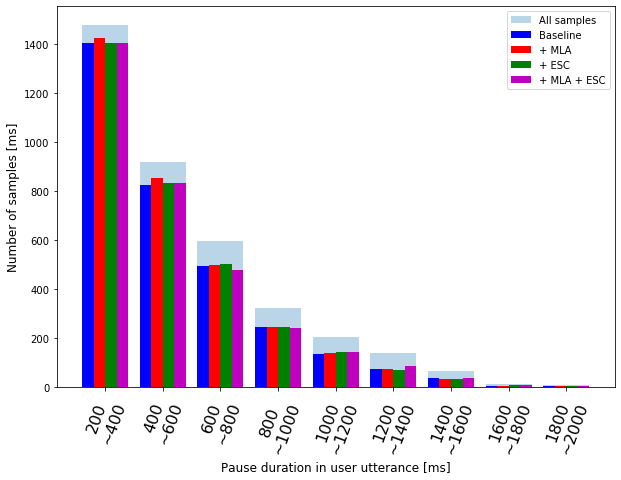

In [7]:
# システムが話さない場面での評価
def get_score():
    tns = {'baseline':[], 'baseline parallel':[], 'w/ ESC': [], 'w/ ESC parallel': []}
    nums  = {'baseline':[], 'baseline parallel':[], 'w/ ESC': [], 'w/ ESC parallel': []}
        
    durs = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800]
    for name in ['baseline', 'baseline parallel', 'w/ ESC', 'w/ ESC parallel']:
        df = csv2[name]
        for dur in durs:
            d = dur // 50
            df_tmp = df[(df['silence']<d+4-1) & (df['silence']>=d-1)]
            if len(df_tmp)>0:
                df_tmp = df_tmp[(df_tmp['type']=='TN') | (df_tmp['type']=='FP')]

                if 'TN' in df_tmp['type'].value_counts():
                    tn = df_tmp['type'].value_counts()['TN']
                else:
                    tn = 0

                if 'FP' in df_tmp['type'].value_counts():            
                    fp = df_tmp['type'].value_counts()['FP']
                else:
                    fp = 0

            else:
                tn=0
                fp=0
            nums[name].append(tn+fp)
            tns[name].append(tn)
            
    return tns, nums
 
x = [n for n in [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800]]
x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
x = np.array(x)
#xl = ["{}~{}".format(n, n+200) for n in [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800]]
xl = ["{}\n~{}".format(n, n+200) for n in [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800]]

plt.figure(figsize=(10, 7))
plt.subplots_adjust(wspace=0.1)
ax1 = plt.subplot(1, 1, 1)

margin=0.2
width = (1-margin)/4
totoal_width = 1-margin    

tns, nums = get_score()

center = ((x-totoal_width*(1-(2*1+1)/4)/2) + (x-totoal_width*(1-(2*2+1)/4)/2)) / 2
p0 = ax1.bar(center, nums['baseline'], width=width*4, alpha=0.3)

p1 = ax1.bar(x-totoal_width*(1-(2*0+1)/4)/2, tns['baseline'], width=width, color='b')
p2 = ax1.bar(x-totoal_width*(1-(2*1+1)/4)/2, tns['baseline parallel'], width=width, color='r')
p3 = ax1.bar(x-totoal_width*(1-(2*2+1)/4)/2, tns['w/ ESC'], width=width, color='g')
p4 = ax1.bar(x-totoal_width*(1-(2*3+1)/4)/2, tns['w/ ESC parallel'], width=width, color='m')
ax1.set_xlabel("Pause duration in user utterance [ms]", fontsize=12)
ax1.set_ylabel("Number of samples [ms]", fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(xl, rotation=70, fontsize=16)
ax1.legend((p0[0], p1[0], p2[0], p3[0], p4[0]), ("All samples", "Baseline", "+ MLA", "+ ESC", "+ MLA + ESC"))

plt.show()

In [8]:
#MAX = 3000
df = csv['baseline']
df_TP = df[df['type']==1]
    
errs = np.array([abs(e) for e in df_TP['error'].values])
#errs = errs[errs<MAX]

df2 = csv['baseline parallel']
df_TP2 = df2[df2['type']==1]
    
errs2 = np.array([abs(e) for e in df_TP2['error'].values])
#errs2 = errs2[errs2<MAX]

df3 = csv['w/ ESC']
df_TP3 = df3[df3['type']==1]
    
errs3 = np.array([abs(e) for e in df_TP3['error'].values])
# #errs3 = errs3[errs3<MAX]

df4 = csv['w/ ESC parallel']
df_TP4 = df4[df4['type']==1]
    
errs4 = np.array([abs(e) for e in df_TP4['error'].values])
# #errs3 = errs3[errs3<MAX]

print('中央値', np.median(errs))
print('平均値', np.mean(errs))

print('中央値', np.median(errs2))
print('平均値', np.mean(errs2))

print('中央値', np.median(errs3))
print('平均値', np.mean(errs3))

print('中央値', np.median(errs4))
print('平均値', np.mean(errs4))

中央値 300.0
平均値 374.56320657759505
中央値 300.0
平均値 353.18930041152265
中央値 275.0
平均値 362.73006134969324
中央値 250.0
平均値 356.83632734530937


/home/jsakuma/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


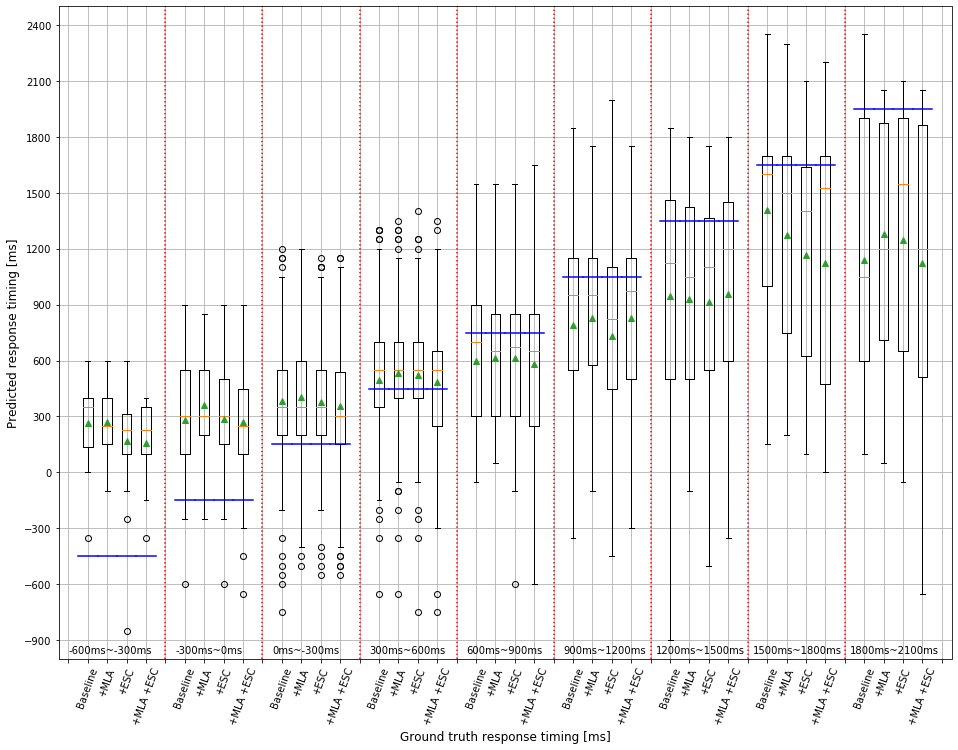

In [10]:
#予測タイミングの分布

B = 300
errors = [[], [], []]
errors2 = []
errors3 = []
errors4 = []
#plt.figure(figsize=(16, 16))
plt.figure(figsize=(16, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
ax1 = plt.subplot(1, 1, 1)
#ax2 = plt.subplot(2, 1, 2)
#ax3 = plt.subplot(3, 1, 3)
# ax4 = plt.subplot(2, 2, 4)


x = [-2, -1, 0, 1, 2, 3, 4, 5, 6]
xl = [[], []] # ["{}~{}".format(n*300, (n+1)*300) for n in [-2, -1, 0, 1, 2, 3, 4, 5, 6]]

errors[0].append([])
xl[0].append("")
for i in [-2, -1, 0, 1, 2, 3, 4, 5, 6]:
    listtid = 0        
        
    tmp1 = df_TP[(df_TP['target']>=B*i) & (df_TP['target']<B*(i+1))]    
    errors[listtid].append(tmp1['pred'].tolist())
    if i<7:
        xl[listtid].append("Baseline")
    
    tmp2 = df_TP2[(df_TP2['target']>=B*i) & (df_TP2['target']<B*(i+1))]    
    errors[listtid].append(tmp2['pred'])
    if i<7:
        xl[listtid].append("+MLA")

    tmp3 = df_TP3[(df_TP3['target']>=B*i) & (df_TP3['target']<B*(i+1))]    
    errors[listtid].append(tmp3['pred'])
    if i<7:
        xl[listtid].append("+ESC")

    tmp4 = df_TP4[(df_TP4['target']>=B*i) & (df_TP4['target']<B*(i+1))]    
    errors[listtid].append(tmp4['pred'])
    if i<7:
        xl[listtid].append("+MLA +ESC")
    
    errors[listtid].append([])
    if i<7:
        xl[listtid].append("")

bx1 = ax1.boxplot(errors[0], showmeans=True)
for i, j in zip(np.arange(1, 50, 5), np.arange(1, 10, 1)):    
    _ = ax1.plot([i+0.5, i+1.5], [j*300-300*2.5, j*300-300*2.5], color='blue')
    _ = ax1.plot([i+1+0.5, i+1+1.5], [j*300-300*2.5, j*300-300*2.5], color='blue')
    _ = ax1.plot([i+2+0.5, i+2+1.5], [j*300-300*2.5, j*300-300*2.5], color='blue')
    _ = ax1.plot([i+3+0.5, i+3+1.5], [j*300-300*2.5, j*300-300*2.5], color='blue')

for i in [1,2,3,4,5,6,7,8]:
    _ = ax1.vlines(5*i+1, -1000, 2500, color='r', linestyles='dotted')

_ = ax1.set_xticklabels(xl[0], rotation=70)
ax1.grid()
#ax1.legend()
ax1.set_xlabel("Ground truth response timing [ms]", fontsize=12)
ax1.set_ylabel("Predicted response timing [ms]", fontsize=12)
ax1.set_yticks(np.arange(-900, 2500, 300))
_ = ax1.set_ylim([-1000, 2500])

ax1.text(1, -970, "-600ms~-300ms", fontsize=10)
ax1.text(6+0.5, -970, "-300ms~0ms", fontsize=10)
ax1.text(11+0.5, -970, "0ms~-300ms", fontsize=10)
ax1.text(16+0.5, -970, "300ms~600ms", fontsize=10)
ax1.text(21+0.5, -970, "600ms~900ms", fontsize=10)
ax1.text(26+0.5, -970, "900ms~1200ms", fontsize=10)
ax1.text(31+0.25, -970, "1200ms~1500ms", fontsize=10)
ax1.text(36+0.25, -970, "1500ms~1800ms", fontsize=10)
ax1.text(41+0.25, -970, "1800ms~2100ms", fontsize=10)

plt.savefig('errors.png')
plt.show()